<a href="https://colab.research.google.com/github/Amithesh0107/AI-ML-/blob/main/DT_INSURANCE_REG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Load the Insurance dataset (ensure the CSV is downloaded from Kaggle)
df = pd.read_csv('insurance.csv')

In [ ]:
# Display first few rows to understand the data
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
# The dataset includes the following columns:
# age, sex, bmi, children, smoker, region, and charges
# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [ ]:
# Define features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
reg = DecisionTreeRegressor(random_state=42)

In [ ]:
# Set up a hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Use GridSearchCV for hyperparameter tuning with negative MSE as the scoring metric
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

# Retrieve the best estimator and evaluate it on the test set
best_reg = grid_search.best_estimator_
y_pred = best_reg.predict(X_test)

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Calculate the Mean Squared Error and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Test RMSE:", rmse)

Test RMSE: 4776.261074558304


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Set up a hyperparameter grid for the Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
print("Best hyperparameters for RF:", grid_search_rf.best_params_)

# Evaluate the best estimator on the test set
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("Random Forest Test RMSE:", rmse_rf)


Best hyperparameters for RF: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Test RMSE: 4425.2149895509465


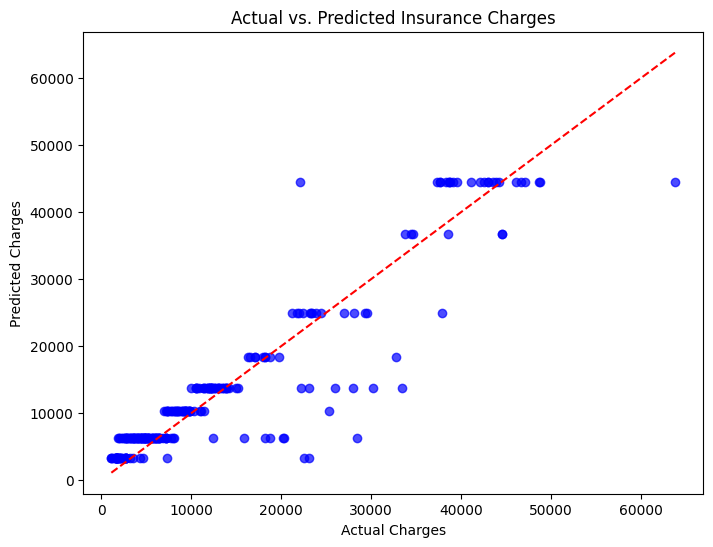

In [ ]:
# Plot Actual vs. Predicted Insurance Charges
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Insurance Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

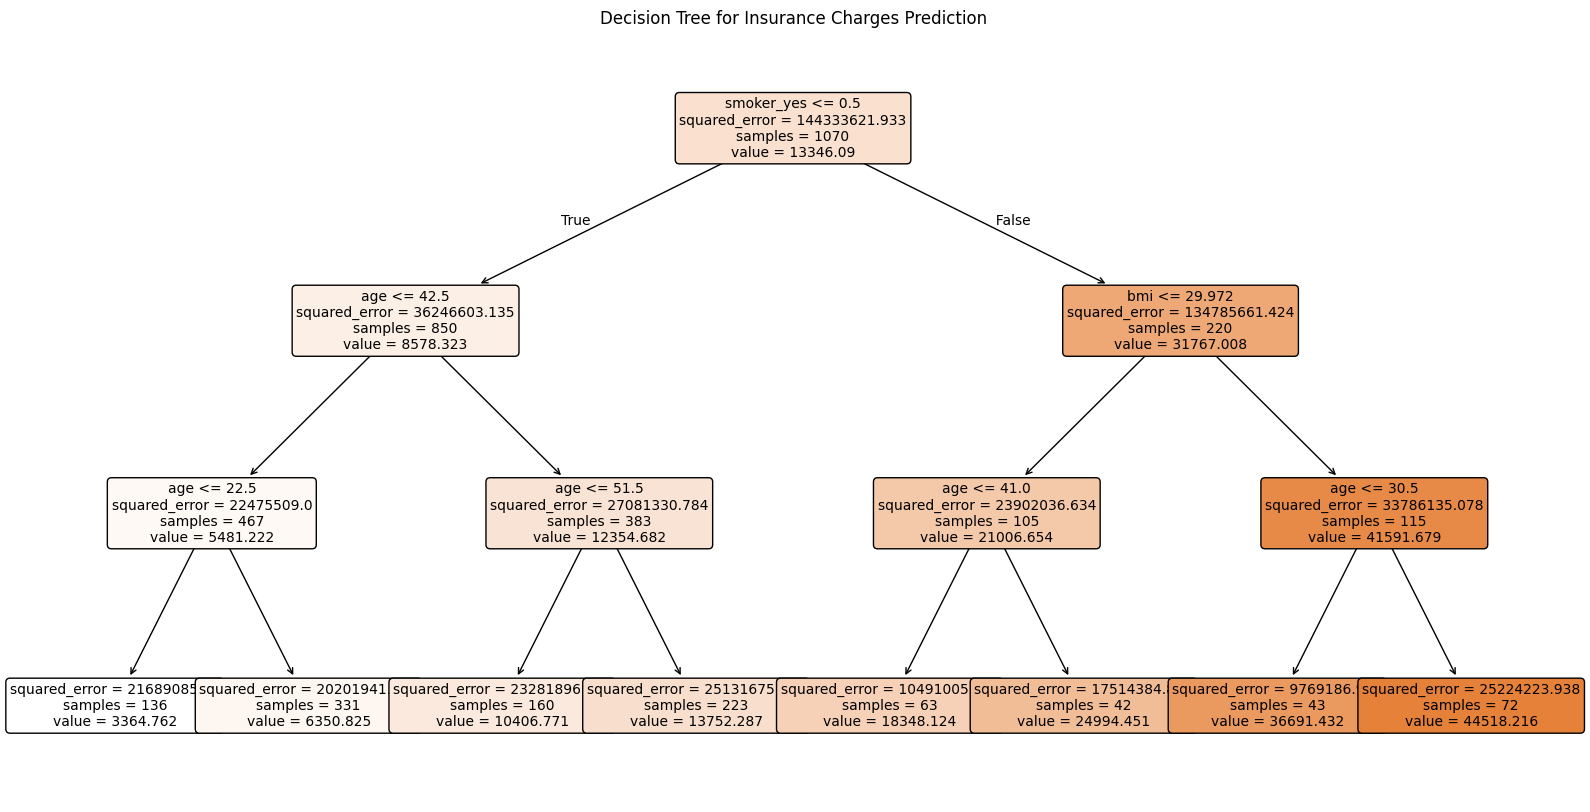

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(best_reg,
          feature_names=X.columns,  # Ensure this matches your dataset's feature names
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Insurance Charges Prediction")
plt.show()df